<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>Loading and Displaying Images</h1>
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image
import numpy as np

dataset_path = '/content/drive/My Drive/DLProject/merged'
target_size = (256, 256)

data = []
labels = []

for class_index in range(1, 11):
    class_folder = os.path.join(dataset_path, str(class_index))

    # Check if the class folder exists
    if os.path.exists(class_folder) and os.path.isdir(class_folder):
        # List all files in the class folder
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            if image_path.endswith('.png'):
                # Open the image
                with Image.open(image_path) as img:
                    # Resize the image
                    img = img.resize(target_size)

                    # Convert the image to a numpy array and normalize the pixels
                    img_array = np.array(img) / 255.0

                    # Append the image data and label to the lists
                    data.append(img_array)
                    labels.append(class_index)
    else:
        print(f"Folder {class_folder} does not exist or is not a directory")

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)


Images loaded and resized: (2679, 256, 256, 4)
Labels collected: (2679,)


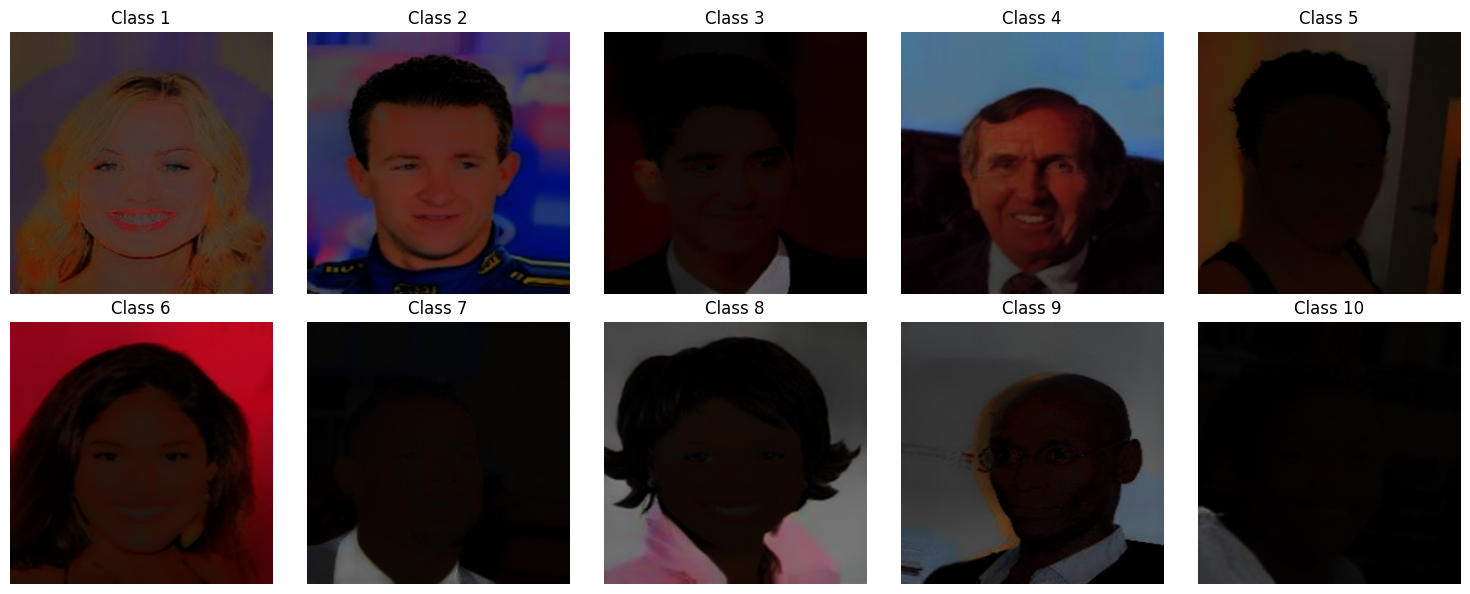

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set up the grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust the grid size and figure dimensions as needed
axes = axes.flatten()  # Flatten the grid to ease indexing

# We'll use a dictionary to track the first appearance of each class
displayed_classes = {}

# Iterate over the images and their corresponding labels
for idx, label in enumerate(labels):
    if label not in displayed_classes:
        displayed_classes[label] = True  # Mark the class as displayed

        # Display the image in the corresponding subplot
        ax = axes[label - 1]  # Adjust index since label starts from 1
        ax.imshow(data[idx])
        ax.set_title(f'Class {label}')
        ax.axis('off')

        # Check if all classes have been displayed
        if len(displayed_classes) == 10:
            break  # Exit loop once one image from each class is displayed

plt.tight_layout()
plt.show()


In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Paths and parameters
data_dir = '/content/drive/My Drive/DLProject/merged'
train_ratio = 0.9
batch_size = 16

# Define the transformations for your dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load dataset from the directory using ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Calculate sizes for training and test sets
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size

# Split dataset into training and test sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader for each set
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size


Training set size: 2411
Test set size: 268


In [ ]:
model.eval()
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assume data is already loaded and is available as `data` and `labels`
# Flatten the data if necessary (if images are not already in flattened form)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)


X_train_encoded = model.encoder(X_train)
X_test_encoded = model.encoder(X_test)


# Assuming y_train and y_test are already defined as per your previous code

# Initialize and train the SVM model with the RBF kernel on the encoded training data
classifier = SVC(kernel='linear')  # gamma='scale' uses 1 / (n_features * X.var()) as the value of gamma
classifier.fit(X_train_encoded, y_train)

# Predict on the encoded test data
y_pred = classifier.predict(X_test_encoded)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>LDA</h1>
</div>

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Flatten the data
data_flattened = data.reshape(data.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.3, random_state=42)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Predict on the test set
y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


KeyboardInterrupt: 

<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>PCA with LDA</h1>
</div>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data_flattened = data.reshape(data.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.3, random_state=42)

# Initialize PCA and LDA
pca = PCA(n_components=0.95)  # Keep 95% of variance
lda = LinearDiscriminantAnalysis()

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Transform test data with the same PCA
X_test_pca = pca.transform(X_test)

# Train the LDA model on the PCA-transformed training data
lda.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test set
y_pred = lda.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>PCA with Logistic Regression</h1>
</div>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume data is already loaded and is available as `data` and `labels`
# Flatten the data if necessary (if images are not already in flattened form)
data_flattened = data.reshape(data.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.3, random_state=42)

# Initialize PCA and Logistic Regression
pca = PCA(n_components=0.75)  # Keep 75% of variance
logistic = LogisticRegression(max_iter=5000)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Transform test data with the same PCA
X_test_pca = pca.transform(X_test)

# Train the Logistic Regression model on the transformed training data
logistic.fit(X_train_pca, y_train)

# Predict on the transformed test set
y_pred = logistic.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>PCA with SVM</h1>
</div>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume data is already loaded and is available as `data` and `labels`
# Flatten the data if necessary (if images are not already in flattened form)
data_flattened = data.reshape(data.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.3, random_state=42)

# Initialize PCA and SVM
pca = PCA(n_components=0.75)  # Keep 75% of variance
svm = SVC(max_iter=5000)  # You can adjust parameters such as `kernel` based on your data

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Transform test data with the same PCA
X_test_pca = pca.transform(X_test)

# Train the SVM model on the transformed training data
svm.fit(X_train_pca, y_train)

# Predict on the transformed test set
y_pred = svm.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


NameError: name 'data' is not defined

<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>Autoencoder with Log Regression</h1>
</div>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

data_flattened = data.reshape(data.shape[0], -1)  # Flatten images

# Split data into training and testing sets
X_train, X_test = train_test_split(data_flattened, test_size=0.3, random_state=42)

encoding_dim = 32  # Size of the encoded representations

# Input layer
input_img = Input(shape=(X_train.shape[1],))


# Encoder Layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder Layers
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))


Epoch 1/50
8/8 [==============================] - 10s 826ms/step - loss: 0.5066 - val_loss: 0.3471
Epoch 2/50
8/8 [==============================] - 2s 271ms/step - loss: 0.2976 - val_loss: 0.2770
Epoch 3/50
8/8 [==============================] - 2s 271ms/step - loss: 0.2638 - val_loss: 0.2645
Epoch 4/50
8/8 [==============================] - 2s 268ms/step - loss: 0.2574 - val_loss: 0.2587
Epoch 5/50
8/8 [==============================] - 2s 261ms/step - loss: 0.2537 - val_loss: 0.2568
Epoch 6/50
8/8 [==============================] - 2s 276ms/step - loss: 0.2512 - val_loss: 0.2536
Epoch 7/50
8/8 [==============================] - 2s 272ms/step - loss: 0.2493 - val_loss: 0.2527
Epoch 8/50
8/8 [==============================] - 2s 274ms/step - loss: 0.2484 - val_loss: 0.2522
Epoch 9/50
8/8 [==============================] - 2s 266ms/step - loss: 0.2478 - val_loss: 0.2515
Epoch 10/50
8/8 [==============================] - 2s 264ms/step - loss: 0.2473 - val_loss: 0.2512
Epoch 11/50
8/8 [=

In [ ]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

26/26 [==============================] - 0s 9ms/step


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize and train the SVM model with the RBF kernel on the encoded training data
classifier = SVC(kernel='linear')
classifier.fit(X_train_encoded, y_train)

# Predict on the encoded test data
y_pred = classifier.predict(X_test_encoded)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 33.58%


<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>Autoencoder with SVM</h1>
</div>

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize the SVM model
svm = SVC()

# Train the SVM model on the encoded training data
svm.fit(X_train_encoded, y_train)

# Predict on the encoded test data
y_pred = svm.predict(X_test_encoded)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 27.86%
